## 322 - How to Plot Wind Roses in Python with Windrose

[Youtube](https://www.youtube.com/watch?v=rlpcedZKccU)

[Windrose](https://github.com/python-windrose/windrose)

[ASOS Data](mesonet.agron.iastate.edu/request/download.phtml?network=CO_ASOS)

Selected Stations: [C99], [APA], [LMO], [DEN]

Variables: Wind Direction, Wind Speed [knots]

Date Range: 01 Jan 2024 to 31 Dec 2024

In [1]:
# !pip install windrose

In [2]:
import pandas as pd
from windrose import WindroseAxes

In [3]:
df = pd.read_csv('asos.csv', na_values = ['M'])
df = df.dropna()

In [4]:
df.head()

,station,valid,lon,lat,drct,sknt
0,C99,2024-01-01 00:15,-105.5533,39.8689,290.0,7.0
1,LMO,2024-01-01 00:15,-105.1630,40.1637,0.0,0.0
2,LMO,2024-01-01 00:35,-105.1630,40.1637,0.0,0.0
3,C99,2024-01-01 00:35,-105.5533,39.8689,300.0,11.0
4,DEN,2024-01-01 00:53,-104.6575,39.8328,80.0,3.0


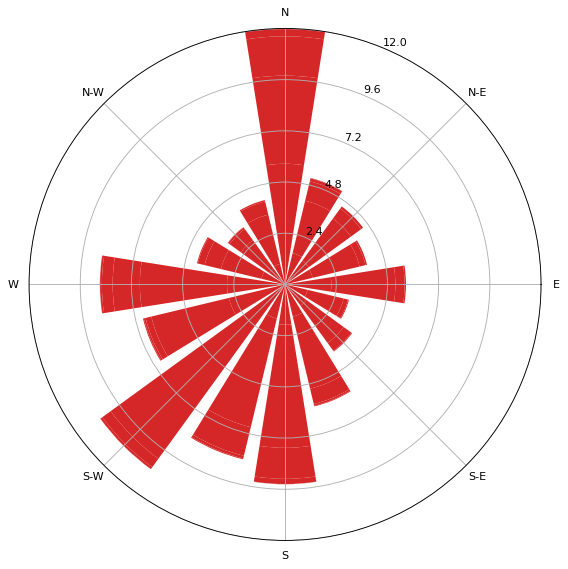

In [5]:
station_data = df[df['station']== 'DEN']
ax = WindroseAxes.from_ax()
ax.bar(station_data['drct'].values, station_data['sknt'].values, normed = True, colors = 'tab:red')

In [6]:
stations = df['station'].unique()

In [7]:
stations

array(['C99', 'LMO', 'DEN', 'APA'], dtype=object)

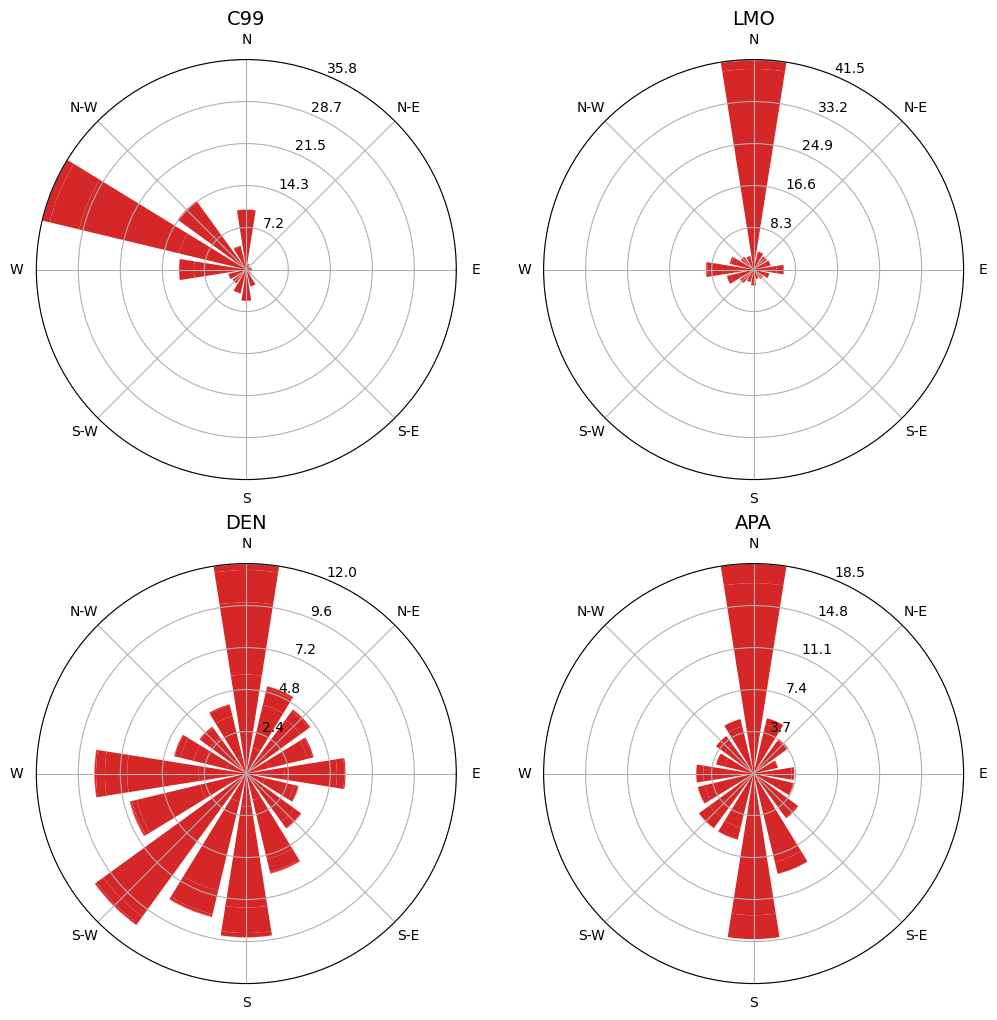

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize = (12, 12), subplot_kw = {'projection':'windrose'})
axes = axes.flatten()

for i, station in enumerate(stations):
    ax = axes[i]
    station_data = df[df['station'] == station]
    ax.bar(station_data['drct'].values, station_data['sknt'].values, normed = True, colors = 'tab:red')
    ax.set_title(station, fontsize = 14)